In [2]:
import polars as pl

df = pl.read_csv("edges.csv", separator=";")
df.head()

id,source,target,length,nlanes,type,maxspeed,name,geometry,forbiddenTurns,coilcode,weight
i64,i64,i64,f64,i64,i64,f64,i64,str,str,i64,f64
0,0,1,334.47744,1,3,30.0,0,"""LINESTRING (11.261444 44.48220…",null,0,17.548694
1,0,30,476.346062,1,3,30.0,1,"""LINESTRING (11.261444 44.48220…",null,1,26.827767
2,1,29,174.046064,1,3,30.0,2,"""LINESTRING (11.261662 44.48521…",null,2,9.59872
3,2,3,169.825912,1,1,30.0,3,"""LINESTRING (11.343921938588428…",null,3,46.471363
4,2,1002,105.309438,1,1,30.0,4,"""LINESTRING (11.343921938588428…",null,4,19.038888


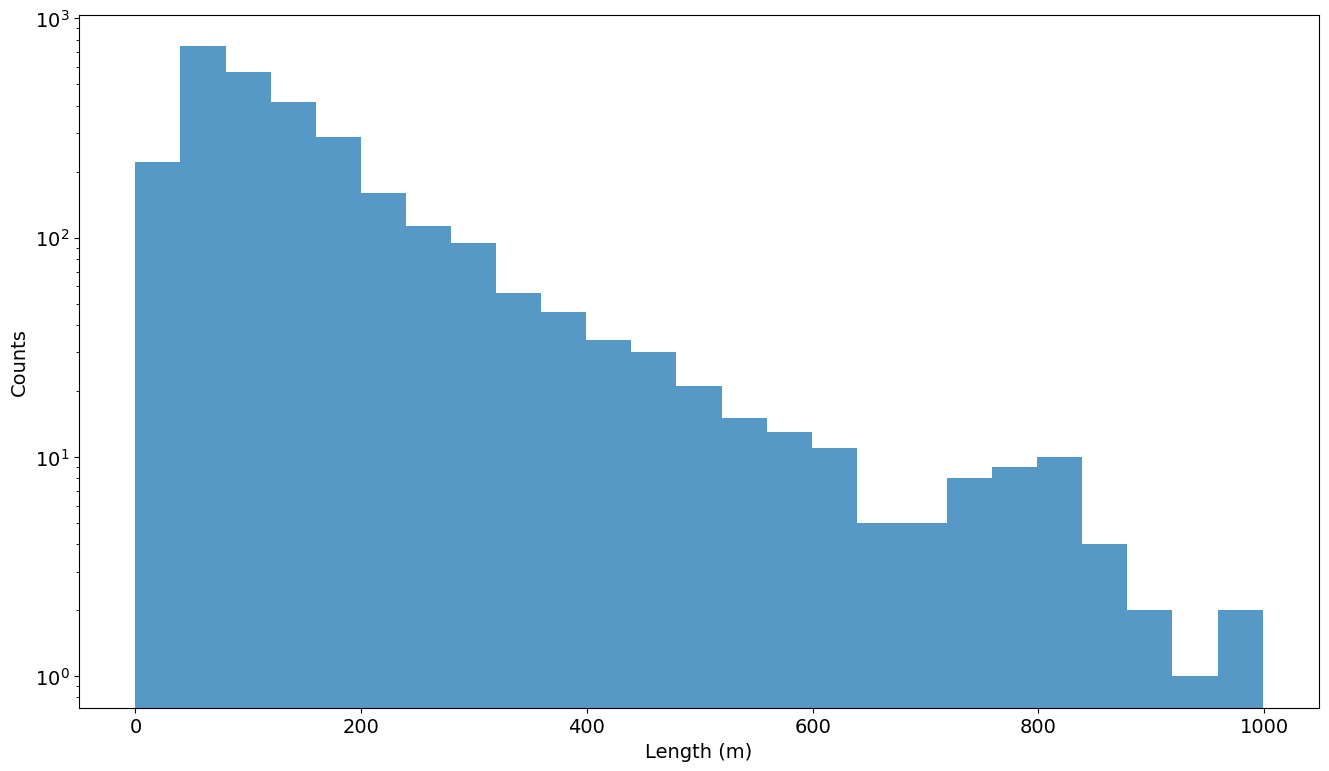

In [ ]:
# make histogram of lengths
from matplotlib import pyplot as plt
lengths = df["length"].to_numpy()
lengths = lengths[lengths < 1000]
lengths = lengths

plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(16, 9))
plt.hist(lengths, bins=25, alpha=0.75)
plt.yscale("log")
plt.xlabel("Length (m)")
plt.ylabel("Counts")
plt.savefig("bologna_lengths.pdf")
plt.show()

In [4]:
import folium
import pickle
import polars as pl
import matplotlib.colors as mcolors
from matplotlib import cm
import numpy as np

# Read origin_dict.pkl and plot the locations on a map, using a colorscale based on the number of agents originating from that node
origin_nodes = pickle.load(open("destination_dict.pkl", "rb"))
m = folium.Map(location=[44.493, 11.342], zoom_start=13)
max_agents = np.log(max(origin_nodes.values()))
min_agents = np.log(min(origin_nodes.values()))
norm = mcolors.Normalize(vmin=min_agents, vmax=max_agents)
cmap = cm.viridis
for node_id, weight in origin_nodes.items():
    # get lat and lon of node_id from nodes.csv
    df_nodes = pl.read_csv("nodes.csv", separator=";")
    node = df_nodes.filter(pl.col("id") == node_id).to_dicts()[0]
    lat = node["lat"]
    lon = node["lon"]
    color = mcolors.to_hex(cmap(norm(np.log(weight))))
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        popup=f"Node {node_id}: {weight} agents",
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=1.0,
    ).add_to(m)

m.save("origin_nodes.html")

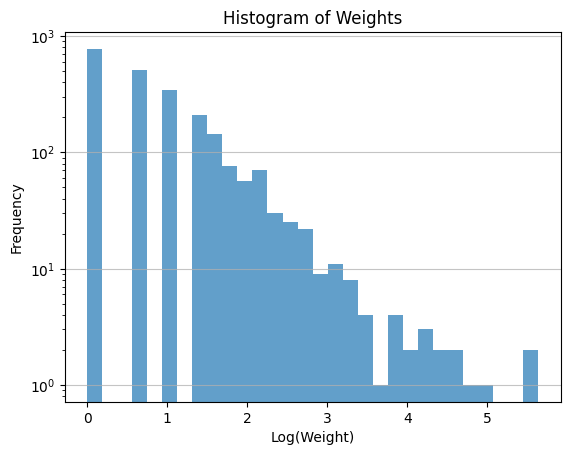

In [14]:
# print mean and std of weights
import numpy as np

weights = np.array(list((origin_nodes.values())))
weights = np.log(weights)
# Plot histogram of weights
import matplotlib.pyplot as plt

plt.hist(weights, bins=30, alpha=0.7)
plt.title("Histogram of Weights")
plt.xlabel("Log(Weight)")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.yscale("log")
plt.show()

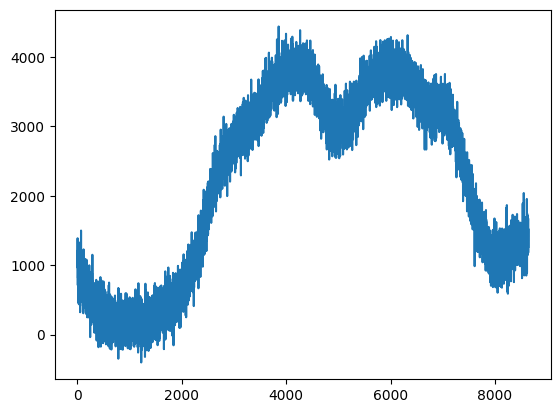

In [13]:
import pickle

input_vehicles = np.load("../input/vehicles10seconds_spline.npy")

plt.plot(input_vehicles)

In [5]:
from collections import defaultdict

# Compute mean weights for origins
origin_weights = defaultdict(list)
for d in origin_dicts:
    for k, v in d.items():
        origin_weights[k].append(v)
origin_mean = {k: sum(v) / len(v) for k, v in origin_weights.items()}

# Compute mean weights for destinations
destination_weights = defaultdict(list)
for d in destination_dicts:
    for k, v in d.items():
        destination_weights[k].append(v)
destination_mean = {k: sum(v) / len(v) for k, v in destination_weights.items()}

print("Mean weights for origins:")
print(origin_mean)
print("\nMean weights for destinations:")
print(destination_mean)

Mean weights for origins:
{121: 8.857142857142858, 3401: 1.5384615384615385, 1: 3.909090909090909, 2287: 1.8888888888888888, 2950: 17.125, 2419: 2.0, 2465: 76.16666666666667, 305: 4.3, 1396: 4.739130434782608, 4066: 2.3333333333333335, 824: 4.2, 3633: 57.25, 1245: 1.25, 1766: 1.3, 2019: 1.3333333333333333, 3223: 1.6666666666666667, 24: 1.3636363636363635, 1978: 7.578947368421052, 1899: 1.8888888888888888, 3033: 1.3333333333333333, 1336: 1.0, 3277: 1.25, 1512: 3.6, 1156: 1.3, 1750: 2.6470588235294117, 2417: 1.5555555555555556, 4185: 13.75, 3563: 1.4285714285714286, 842: 1.2, 259: 3.1176470588235294, 1269: 33.25, 938: 4.181818181818182, 582: 1.8666666666666667, 4031: 2.9473684210526314, 4210: 2.176470588235294, 4051: 1.6470588235294117, 1849: 1.0, 4324: 1.0, 1652: 2.9444444444444446, 4361: 40.416666666666664, 1841: 3.7857142857142856, 4034: 1.3333333333333333, 1138: 1.0, 856: 5.291666666666667, 2128: 3.9523809523809526, 3741: 8.681818181818182, 1028: 1.4285714285714286, 4286: 1.375, 1107

In [3]:
import polars as pl

nodes = pl.read_csv("nodes.csv", separator=";")
nodes

id,lat,lon,type
i64,f64,f64,str
0,44.523945,11.292819,""""""
1,44.52755,11.353007,"""motorway_junction"""
2,44.516538,11.375631,"""none"""
3,44.519535,11.373457,""""""
4,44.519333,11.369895,""""""
…,…,…,…
4364,44.529876,11.240847,"""none"""
4365,44.53022,11.240891,""""""
4366,44.530301,11.240467,"""none"""


In [21]:
import folium
import matplotlib.colors as mcolors
from matplotlib import cm
import numpy as np
import branca.colormap as cm_branca

# Plot on a map the origins using origins as the set of ids and extracting lat/lon from nodes
m = folium.Map(location=[44.493, 11.342], zoom_start=13.5, tiles="Cartodb positron")

weights_values = list(origin_mean.values())
max_w = np.log(max(weights_values))
min_w = np.log(min(weights_values))
norm = mcolors.Normalize(vmin=min_w, vmax=max_w)
cmap = cm.viridis

for node_id, weight in origin_mean.items():
    # get lat and lon of node_id from nodes
    node = nodes.filter(pl.col("id") == node_id).to_dicts()[0]
    lat = node["lat"]
    lon = node["lon"]
    color = mcolors.to_hex(cmap(norm(np.log(weight))))
    folium.CircleMarker(
        location=[lat, lon],
        radius=2.5,
        popup=f"Node {node_id}: {weight}",
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=1.0,
    ).add_to(m)

# Add colorbar
colormap = cm_branca.LinearColormap(
    colors=['#440154', '#3b528b', '#21918c', '#5ec962', '#fde725'],
    index=[min_w, min_w + (max_w - min_w)/4, min_w + 2*(max_w - min_w)/4, min_w + 3*(max_w - min_w)/4, max_w],
    vmin=min_w,
    vmax=max_w,
    caption='Log Mean Weight'
)
m.add_child(colormap)

m.save("origin_nodes.html")